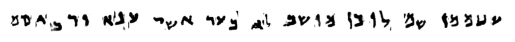

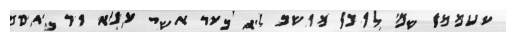

In [ ]:
# Combo of texture + shear. This can be combined into one function called 'augment' if we want all data to be both sheared AND textured.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original data (image of line segment of our synthetic data)
image = cv2.imread("/Users/amandagerald/Documents/DLP/DeepLearningPractical/Data augmentation/Segmented_line_1_bin.jpeg", cv2.IMREAD_GRAYSCALE)
# Choose the texture you want to use for overlaying
texture = cv2.imread("/Users/amandagerald/Documents/DLP/DeepLearningPractical/Data augmentation/Concrete_TextureLab.jpg")


#Display loaded image (for testing)  #FYI margins only appear in the IDE to display the image (when saving image to file, there are no white margins, so not a problem)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.show()

#Apply SHEARING
sheared_image = shear_image(image, shear_factor=-0.3)  # Shear_factor: if (+) then slants to right, if (-) then slants to left, if higher value then applies more slant

#Apply TEXTURED BACKGROUND
sheared_textured_image= add_texture(sheared_image, texture)

# Display sheard & textured image
plt.imshow(sheared_textured_image, cmap='gray')
plt.axis("off")
plt.show()

#save image
plt.imsave("augmented_image.png", sheared_textured_image, cmap='gray', format='png', dpi=300) #save image in .png format, with no margins




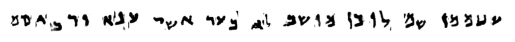

In [ ]:
# Just to load the data you want to augment
import cv2
import numpy as np
#import albumentations as A
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/Users/amandagerald/Documents/DLP/DeepLearningPractical/Data augmentation/Segmented_line_1_bin.jpeg", cv2.IMREAD_GRAYSCALE)

#Display loaded image (for testing)  #FYI margins only appear in the IDE to display the image (when saving image to file, there are no white margins, so not a problem)
if image is None:
    print("Error: Image not found or unable to load.")
else:
    plt.imshow(image, cmap='gray')
    plt.axis("off")
    plt.show()


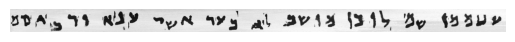

In [ ]:
# ADD TEXTURE TO BACKGROUND ONLY (if we want augmented data with no shear)

import cv2
import matplotlib.pyplot as plt

# Load data image & texture-image
image = cv2.imread("/Users/amandagerald/Documents/DLP/DeepLearningPractical/Data augmentation/Segmented_line_1_bin.jpeg", cv2.IMREAD_GRAYSCALE)
# Choose the texture image you want to overlay
texture = cv2.imread("/Users/amandagerald/Documents/DLP/DeepLearningPractical/Data augmentation/Concrete_TextureLab.jpg")

# function to blend our line-segmented-image (data) with a texture-image of our choice
def add_texture(image, texture, alpha=0.3):                            # higher alpha levels = higher influence of texture --> choose alpha level depending on how much you want the texture intensity to be
    texture = cv2.resize(texture, (image.shape[1], image.shape[0]))    # resize texture-image to size (w,h) of data-image 
    texture = cv2.cvtColor(texture, cv2.COLOR_BGR2GRAY)                # convert texture-image to grayscale (to match binarized image)
    blended = cv2.addWeighted(image, 1 - alpha, texture, alpha, 0)     # overlay texture-image on data
    return blended

# apply 
aug_textured_data = add_texture(image, texture)

#show image
plt.imshow(aug_textured_data, cmap='gray') #show in grayscale
plt.axis("off")
plt.show()

#save image
plt.imsave("augmented_data_1.png", aug_textured_data, cmap='gray', format='png', dpi=300) #save image in .png format, with no margins 



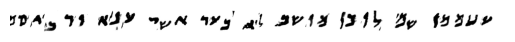

In [ ]:
# SHEARING ONLY (if we want augmented data with no textured backround)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for shearing. 
# Shear_factor: if (+) then slants to right, if (-) then slants to left, if higher value then applies more slant. Set to 0 as default (no shear)
def shear_image(image, shear_factor=0):
   
    height, width = image.shape

    # Define  affine matrix for horizontal shear
    #(1 keeps orgiginal x-scaling, 0 makes sure there's no translation)
    M = np.float32([
        [1, shear_factor, 0],
        [0, 1,            0]
    ])

    # Calculate new width to avoid cropping (in case slant extends past original image edge)
    new_width = int(width + abs(shear_factor) * height)

    # Apply affine warp
    sheared = cv2.warpAffine(
        image,
        M,
        (new_width, height),            # new size of output image
        flags=cv2.INTER_NEAREST,        # prevents smoothing/keeps binarization
        borderValue=255                 # Missing areas filled with white (background)
    )

    return sheared

# Load binarized image
image = cv2.imread("/Users/amandagerald/Documents/DLP/DeepLearningPractical/Data augmentation/Segmented_line_1_bin.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply shear
sheared_image = shear_image(image, shear_factor=-0.3)  # Shear_factor: if (+) then slants to right, if (-) then slants to left, if higher value then applies more slant

# Display
plt.imshow(sheared_image, cmap='gray')
plt.axis("off")
plt.show()

#save image
plt.imsave("sheared_data_1.png", sheared_image, cmap='gray', format='png', dpi=300) #save image in .png format, with no margins

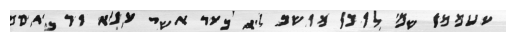

In [38]:
# Combo of texture + shear (basically input sheared image as image)

import cv2
import matplotlib.pyplot as plt

# Load data image & texture-image
image = cv2.imread("/Users/amandagerald/Documents/DLP/DeepLearningPractical/Data augmentation/sheared_data_1.png", cv2.IMREAD_GRAYSCALE)
texture = cv2.imread("/Users/amandagerald/Documents/DLP/DeepLearningPractical/Data augmentation/Concrete_TextureLab.jpg")

# function to blend our line-segmented-image (data) with a texture-image of our choice
def add_texture(image, texture, alpha=0.3):                            # higher alpha levels = higher influence of texture
    texture = cv2.resize(texture, (image.shape[1], image.shape[0]))    # resize texture-image to size (w,h) of data-image 
    texture = cv2.cvtColor(texture, cv2.COLOR_BGR2GRAY)                # convert texture-image to grayscale (to match binarized image)
    blended = cv2.addWeighted(image, 1 - alpha, texture, alpha, 0)     # overlay texture-image on data
    return blended

# apply 
aug_textured_data = add_texture(image, texture)

#show image
plt.imshow(aug_textured_data, cmap='gray') #show in grayscale
plt.axis("off")
plt.show()

#save image
plt.imsave("augmented_data_1.png", aug_textured_data, cmap='gray', format='png', dpi=300) #save image in .png format, with no margins 